In [1]:
%load_ext autoreload
%autoreload 2

# Starter Notebook

Use this notebook as a starting point for using the library.

## setup access token

Don't have an access token yet? [Sign up for free!](https://www.thismlguy.com/)

We're using dotenv library here, alternatively you can simply set the environment variable as:
```
import os
os.environ["CODE_GENIE_TOKEN"] = "your-access-token-here"
```

Though it is not recommended to do so as notebooks are typically shared with others and you should keep your access token private.

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv("../../.env")  # replace with path to your env file

True

## setup cache

By default the package will cache genie invocations in a temp file. This would mean that any genies created will be lost once you restart the kernel or rerun the notebook at another time. to keep the cached genies, you can set a custom path where genies would be stored so that you will not lose them when you rerun the notebook.

You can modify the cached code if you'd like and those modifications would be loaded the next time you run the code.

In [4]:
CACHE_DIR = "./_cache_starter"

## Create data

while you should import your own dataset, we can use code-genie to generate the data for this analysis

In [5]:
from code_genie import Genie

In [6]:
df = Genie(cache_dir=CACHE_DIR).plz(
    ["generate a pandas dataframe containing 100 rows with employee information with following columns id, name, salary (salary per annum in USD), department (should be either engineering or product)", 
     "make salaries for around 10% of the employees missing"], override=True)

Genie cached with id: generate_employee_dataframe_16305


In [7]:
df.shape

(100, 4)

In [8]:
df.head()

,id,name,salary,department
0,1,Employee_1,49669.0,product
1,2,Employee_2,115165.0,engineering
2,3,Employee_3,NaN,product
3,4,Employee_4,86308.0,engineering
4,5,Employee_5,52598.0,product


In [9]:
# create genie instance on this df
genie = Genie(inputs={"df": df}, cache_dir=CACHE_DIR)

## Analyze data

### find number of missing values in each column

In [10]:
genie.plz("find number of missing values in each column")

Genie cached with id: count_missing_values_57234


id             0
name           0
salary        10
department     0
dtype: int64

### plot distribution of salary

Genie cached with id: plot_salary_distribution_88606


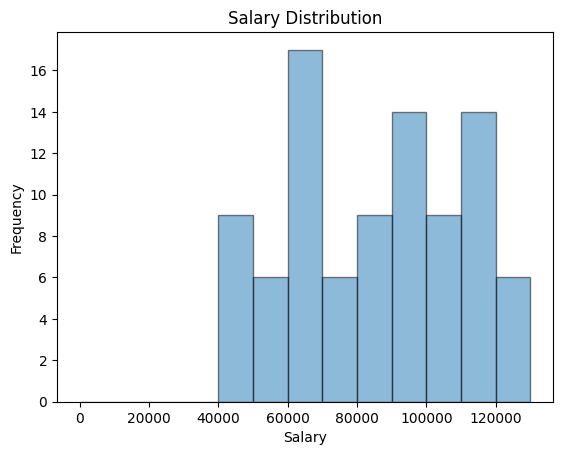

In [11]:
genie.plz("plot distribution of salary, create bins of 10K each, ignore missing values")

Genie cached with id: plot_salary_by_department_20090


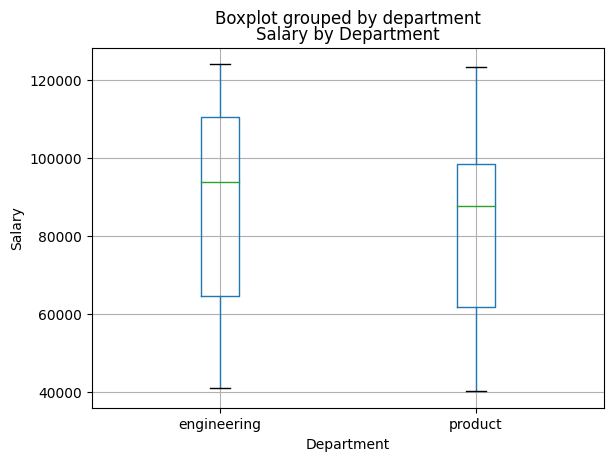

In [12]:
genie.plz("make boxplots of salary grouped by department")

In [13]:
genie.plz("how many people in each department make more than 100K?")

Genie cached with id: high_earners_26869


department
engineering    18
product        11
dtype: int64

# Inspecting Code

All the genies export the generated code to the cache_dir path under individual py files. The exact name of the file used can be found in the log generated on execution. These could be of 2 types:

1. `Genie cached with id: high_earners_19109.py`: this will be shown the first time we run this
2. `Loading cached genie id: generate_employee_df_56623.py, set override = True to rerun`: this will be shown when we run the genie after its cached without setting `override=True`

all cached py files for the starter notebook can be found [here](https://github.com/thismlguy/code-genie/tree/main/docs/notebooks/_cache_starter)

In [14]:
# you can read all cached code using the command:
cache = genie.read_cache()

In [15]:
# these are all the cached genies available
cache.keys()

dict_keys(['generate_employee_dataframe_16305', 'count_missing_values_57234', 'plot_salary_distribution_88606', 'plot_salary_by_department_20090', 'high_earners_26869'])

In [16]:
# lets read one of them
print(cache["high_earners_26869"])

def high_earners(df):
    high_earners_df = df[df['salary'] > 100000]
    return high_earners_df.groupby('department').size()
